<a href="https://colab.research.google.com/github/bridgeytan/bridgeytan.github.io/blob/master/BERT_airline_review_220824.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
from google.colab import files
uploaded = files.upload()


Saving BA_airlinereviews.csv to BA_airlinereviews.csv


In [3]:
!pip install bertopic


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [112]:
pip install wordcloud matplotlib


In [116]:
# Get the topics from BERTopic
topics = topic_model.get_topics()

# Print the top 30 words per topic
for topic_id, topic_words in topics.items():
    # Print topic ID
    print(f"Topic {topic_id}:")

    # Check if there are more than 30 words, otherwise get all
    top_words = topic_words[:30] if len(topic_words) > 30 else topic_words

    # Print each word with its importance
    for word, importance in top_words:
        print(f"  {word}: {importance:.4f}")

    print("\n")


Topic -1:
  good: 0.0478
  crew: 0.0380
  food: 0.0362
  service: 0.0360
  time: 0.0358
  cabin: 0.0350
  seat: 0.0341
  london: 0.0289
  seats: 0.0287
  economy: 0.0269


Topic 0:
  good: 0.0480
  crew: 0.0397
  service: 0.0388
  food: 0.0378
  time: 0.0326
  cabin: 0.0306
  seat: 0.0299
  london: 0.0292
  seats: 0.0286
  heathrow: 0.0275


Topic 1:
  service: 0.0962
  edinburgh: 0.0856
  cityflyer: 0.0847
  rome: 0.0846
  short: 0.0799
  city: 0.0773
  great: 0.0770
  airport: 0.0733
  london: 0.0680
  snack: 0.0560




In [192]:
import pandas as pd

# Load the CSV file into a dataframe
df = pd.read_csv('BA_airlinereviews.csv')

In [193]:
# Filter rows where 'OverallRating' is 7 or more
filtered_df = df[df['OverallRating'] >= 7]

In [194]:
# Fit BERTopic
from bertopic import BERTopic

topic_model = BERTopic()
topics = topic_model.fit_transform(filtered_df['ReviewBody'])

# Optional: Inspect the topics
print(topic_model.get_topic_info())

    Topic  Count                        Name  \
0      -1    681           -1_the_and_to_was   
1       0    111        0_gatwick_the_and_to   
2       1     93         1_london_was_to_and   
3       2     53         2_and_the_lounge_in   
4       3     45        3_and_flight_the_was   
5       4     33           4_the_a380_and_on   
6       5     29   5_british_the_airways_and   
7       6     29             6_the_to_and_in   
8       7     26              7_she_my_to_me   
9       8     26        8_was_flight_the_jfk   
10      9     24           9_the_is_and_club   
11     10     23        10_first_and_was_the   
12     11     20           11_the_is_seat_on   
13     12     18  12_singapore_sydney_and_to   
14     13     17   13_economy_premium_the_in   
15     14     17           14_on_and_very_to   
16     15     16            15_the_we_to_was   
17     16     16   16_belfast_dublin_was_the   
18     17     13     17_the_and_service_fast   
19     18     11       18_to_the_we_heat

In [195]:
# BERTopic visualization
topic_model.visualize_topics()

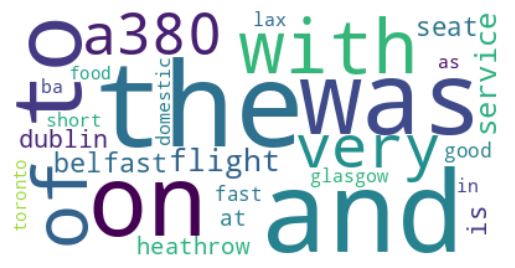

In [198]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wordcloud(model, topics):
    # Initialize a dictionary to hold combined word frequencies
    combined_text = {}

    # Iterate over the list of topics
    for topic in topics:
        # Get the words and frequencies for the current topic
        text = {word: value for word, value in model.get_topic(topic)}

        # Add the words and frequencies to the combined dictionary
        for word, value in text.items():
            if word in combined_text:
                combined_text[word] += value  # Aggregate frequencies if word already exists
            else:
                combined_text[word] = value

    # Normalize or adjust importance if needed
    # Example: normalize values to a scale of 1-1000 for visualization purposes
    max_value = max(combined_text.values(), default=1)
    normalized_text = {word: (value / max_value) * 1000 for word, value in combined_text.items()}

    # Create and configure the word cloud
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(normalized_text)

    # Display the word cloud
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# Show word cloud for topics 1 and 2
create_wordcloud(topic_model, topics=[4, 14, 11, 16, 17, 20])


In [199]:
# Reinitialize BERTopic with the updated number of top words
topic_model = BERTopic(top_n_words=30)  # Adjust as needed

# Retrain the model
topics, probs = topic_model.fit_transform(docs)


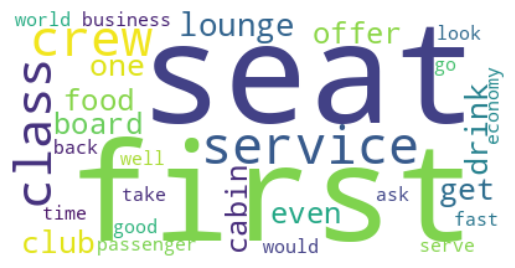

In [204]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wordcloud(model, topic):
    text = {word: value for word, value in model.get_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# Show wordcloud
create_wordcloud(topic_model, topic=3)

In [164]:
from bertopic import BERTopic

# Initialize and fit BERTopic model
topic_model = BERTopic()
topics, probs = topic_model.fit_transform(filtered_df['ReviewBody'])

# Reduce the number of topics to 4
# Pass the original documents to reduce_topics
topic_model = topic_model.reduce_topics(docs=filtered_df['ReviewBody'], nr_topics=3)

# Optionally, you can check the topics
reduced_topics = topic_model.get_topic_info()
print(reduced_topics)

   Topic  Count               Name  \
0     -1    627  -1_the_and_to_was   
1      0    685   0_the_and_to_was   
2      1     11    1_the_and_to_of   

                                      Representation  \
0  [the, and, to, was, on, in, of, flight, with, ...   
1  [the, and, to, was, on, of, in, flight, with, ...   
2  [the, and, to, of, service, with, in, was, on,...   

                                 Representative_Docs  
0  [London to Tel Aviv. Arrived at Heathrow at ab...  
1  [Gatwick to Antigua. This was our first time i...  
2  [Toronto to London return – business to London...  


In [122]:
from gensim.models.coherencemodel import CoherenceModel

# Extract topics in a format compatible with CoherenceModel
bertopic_topics = topic_model.get_topics()
bertopic_words = []

for topic_id, topic in bertopic_topics.items():
    # Extract top words for each topic and append to the list
    words = [word for word, _ in topic]
    bertopic_words.append(words)

# Compute coherence score for BERTopic
coherence_bertopic = CoherenceModel(topics=bertopic_words, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_bertopic_score = coherence_bertopic.get_coherence()

print(f"BERTopic Coherence Score: {coherence_bertopic_score}")


BERTopic Coherence Score: 0.44753016982321
